In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para Ecuación Normal

In [127]:
def normal_equation(X, Y, percent):
    '''Esta función sirve para utilizar el método de regresión lineal con ecuación normal
    normal_equation(X, Y): 
    X: Matriz columna de inputs 
    Y: Matriz columna de outputs
    sample: % de datos que seran utilizados para el test (base 100)
    
    Return: indices_test, indices_train, theta, Y_predict
    
    indices_test: indices de los valores utilizados para el test
    indices_train: indices de los valores utilizados para el entrenamiento
    theta: valores correspondientes a theta_n
    Y_predict: valores de Y obtenidos de la predicción
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    indices_test = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    indices_train = list(np.arange(0, m))
    
    for indice in indices_test:
        indices_train.remove(indice)

    X_train = X[indices_train]
    X_test = X[indices_test]
    Y_train = Y[indices_train]
    Y_test = Y[indices_test]
    
    m = len(X_train)
    
    X_b = np.c_[np.ones((m, 1)), X_train]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_train
    
    m = len(X_test)
    
    X_b_test = np.c_[np.ones((m, 1)), X_test]
    Y_predict = X_b_test @ theta
    
    return indices_test, indices_train, theta, Y_predict

In [128]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 3 + 4*X + 1.5*np.random.randn(m, 1)
indices_test, indices_train, theta, Y_predict = normal_equation(X, y, 25)

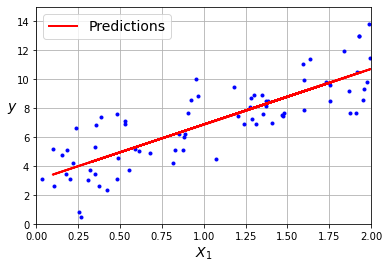

In [129]:
plt.plot(X[indices_train], y[indices_train], "b.")
plt.plot(X[indices_test], Y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

# Datos del archivo A